# Introduction

See the README file of the lesson.

# Loading the tidyverse lesson and dataset downloading

 ## Load the library   

In [36]:
library(tidyverse,warn.conflicts = FALSE)

## Data import and first insight into the data
From the `tidyverse` package, we get access to some functions to read data from different sources.  
One of them is `read_delim` which allows us to read tabular files from online sources.

Go to the lesson of today: 
1. Go to www.scienceparkstudygroup.info
2. Click on the __tidyverse__ lesson title
3. Click on the `trichomes.tsv` file
4. Click on _Raw_ and copy the link. It should start up with _https://raw.githubusercontent.com/_)

In [37]:
# read data directly from github
file_url = "https://raw.githubusercontent.com/ScienceParkStudyGroup/studyGroup/gh-pages/lessons/20190219_tidyverse_Marc/trichomes.tsv"
df = read_delim(file = file_url ,delim = "\t")

# let's take a look at it
head(df)

# if you want to save this file to your hard drive
#write.table(df,"trichomes.tsv",sep = "\t",quote = F,row.names = F)

Parsed with column specification:
cols(
  genotype = col_character(),
  scientist = col_character(),
  upper = col_integer(),
  lower = col_integer()
)


genotype,scientist,upper,lower
wt-1,petra,117,126
wt-2,petra,94,95
wt-3,petra,93,119
wt-4,petra,102,111
wt-5,petra,145,152
wt-6,peter,117,146


# Identify the experimental factors and convert to tidy format

**Question**: How would you calculate the mean and standard deviation of the trichome counts per person? Is it easy to do?  

**Question**: what are other potential problems with this dataset? What columns need to be changed?

**Question**: how would the corresponding tidy dataset look like?

## First operation on the genotype column
First let's separate the genotype column into a genotype and a biological replicate column.  
We will use the `separate` function from the `tidyr` package to do so.

In [38]:
df.parsed = separate(data = df,col = genotype,into = c("genotype","replicate"))
# let's see how it looks
head(df.parsed)

genotype,replicate,scientist,upper,lower
wt,1,petra,117,126
wt,2,petra,94,95
wt,3,petra,93,119
wt,4,petra,102,111
wt,5,petra,145,152
wt,6,peter,117,146


## Creating a new variable
Then let's reshape the dataframe so that `upper` and `lower` column are transformed into rows.  
They are indeed experimental variables corresponding to the __side of the leaf__ and should have their own column according to the tidy principle. 

In [39]:
# let's make this tidy!
df.tidy = gather(
    data = df.parsed,
    key = "side",      # we define a new variable
    value = counts,    # we give a name to the column that will contain the observation values
    -genotype,-replicate,-scientist) # tells to leave these variables out since they are already well defined
head(df.tidy)

genotype,replicate,scientist,side,counts
wt,1,petra,upper,117
wt,2,petra,upper,94
wt,3,petra,upper,93
wt,4,petra,upper,102
wt,5,petra,upper,145
wt,6,peter,upper,117


Ok so now each variable has its own column.  
Each observation has its own row.  
**It is tidy!**

# Data exploration

## Counts = f(genotype)
Are the trichome counts dependent on the genotype variable?

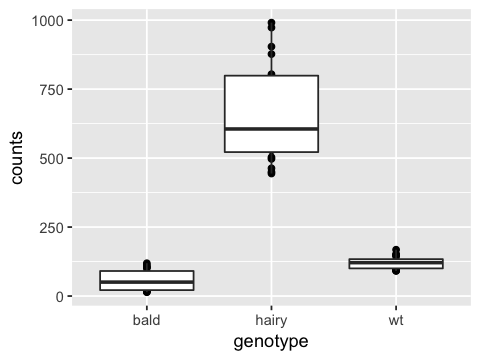

In [40]:
# Change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=3)

ggplot(df.tidy,mapping = aes(x = genotype,y=counts)) +
    geom_point() +
    geom_boxplot()

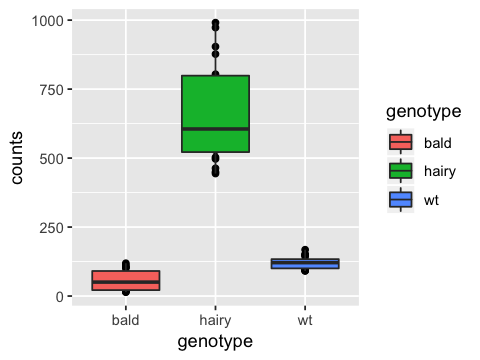

In [41]:
# we can also add some colors to make it look nicer
ggplot(df.tidy,mapping = aes(x = genotype,y=counts,fill=genotype)) +
    geom_point() +
    geom_boxplot()

## Counts = f(genotype,side)

It seems that the genotype is very important for trichome counts. But we might have omitted the leaf side as an explanatory variable. Let's plot it too.

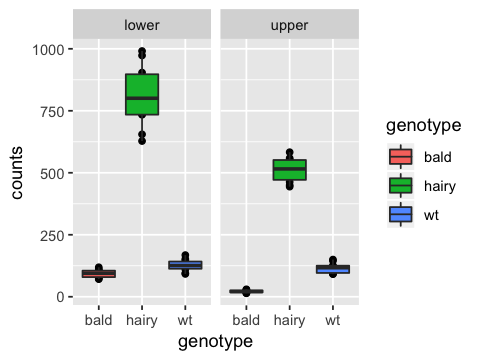

In [42]:
# we facet the plot so that it separates the upper and lower leaf side
ggplot(df.tidy,mapping = aes(x = genotype,y=counts,fill=genotype)) +
geom_point() +
geom_boxplot() + 
facet_wrap(. ~ side)

# ANOVA

**Question**: what experimental factors would you test ?

## Genotype

Let's test the effect of the genotype as it seems that it has the most important effect. 

The ANOVA compares the means of trichome counts among the different genotypes. Then checks if differences are statistically significant. Here are my null and alternative hypothesis:
- H0: all genotypes have the same number of trichomes. 
- H1: not all genotypes have the same number of trichomes. 

In [43]:
aov_genotype = aov(formula = counts ~ genotype,data = df.tidy)
summary(aov_genotype)

            Df  Sum Sq Mean Sq F value Pr(>F)    
genotype     2 4403475 2201738   195.2 <2e-16 ***
Residuals   57  642850   11278                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Good, my F value is high and p-value is very low too.  
In other words, the variation of trichome count means among different genotypes (numerator) is much larger than the variation of trichome counts within each genotype.  
Our p-value is less than 0.05 or 0.01 (normal scientific standards). Hence we can conclude that for our confidence interval we accept the alternative hypothesis H1 that there is a significant relationship between genotypes and trichome counts.

## Other factor
What other factor could you test?

# Two-way ANOVA

__Question__: can you figure out how to make a two-way ANOVA?  
__Question__: what model would you build then?